In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.shape

(6745, 6)

In [4]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [6]:
df['Drop timestamp']= pd.to_datetime(df['Drop timestamp'])
df['Request timestamp']= pd.to_datetime(df['Request timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [7]:
df.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [8]:
df['Month']=df['Request timestamp'].dt.month_name()
df['Dayname']=df['Request timestamp'].dt.day_name()
df['Day']=df['Request timestamp'].dt.day
df['Hour']=df['Request timestamp'].dt.hour
df['Time']=df['Request timestamp'].dt.time
nn=df.dropna()
drt=nn['Drop timestamp']
pct=nn['Request timestamp']
trd=(drt-pct)
df['Trip Duration']=trd


In [32]:
# # remove outliers from Trip duration column
# rot=df.sort_values(by=['Trip Duration'])
# df=rot.loc[['0 days 00:20:47']:['29 days 00:32:00']]

In [25]:
rot.tail(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Month,Dayname,Day,Hour,Time,Trip Duration
6725,6713,City,NaN,No Cars Available,2016-07-15 23:08:14,NaT,July,Friday,15,23,23:08:14,NaT
6726,6715,City,NaN,No Cars Available,2016-07-15 23:11:41,NaT,July,Friday,15,23,23:11:41,NaT
6727,6716,City,NaN,No Cars Available,2016-07-15 23:14:36,NaT,July,Friday,15,23,23:14:36,NaT
6728,6718,Airport,NaN,No Cars Available,2016-07-15 23:14:39,NaT,July,Friday,15,23,23:14:39,NaT
6729,6720,City,NaN,No Cars Available,2016-07-15 23:16:48,NaT,July,Friday,15,23,23:16:48,NaT
6730,6722,Airport,NaN,No Cars Available,2016-07-15 23:18:21,NaT,July,Friday,15,23,23:18:21,NaT
6731,6725,Airport,NaN,No Cars Available,2016-07-15 23:21:53,NaT,July,Friday,15,23,23:21:53,NaT
6732,6728,City,NaN,No Cars Available,2016-07-15 23:26:50,NaT,July,Friday,15,23,23:26:50,NaT
6733,6730,Airport,NaN,No Cars Available,2016-07-15 23:27:55,NaT,July,Friday,15,23,23:27:55,NaT
6734,6732,Airport,NaN,No Cars Available,2016-07-15 23:35:50,NaT,July,Friday,15,23,23:35:50,NaT


In [9]:
df.describe()

,Request id,Driver id,Day,Hour,Trip Duration
count,6745.000000,4095.000000,6745.000000,6745.000000,2831
mean,3384.644922,149.501343,11.231431,12.956709,-1 days +13:14:01.893323914
std,1955.099667,86.051994,3.487899,6.504052,10 days 07:07:51.550378164
min,1.000000,1.000000,7.000000,0.000000,-148 days +00:33:55
25%,1691.000000,75.000000,7.000000,7.000000,0 days 00:41:00
50%,3387.000000,149.000000,13.000000,13.000000,0 days 00:52:05
75%,5080.000000,224.000000,14.000000,19.000000,0 days 01:04:00
max,6766.000000,300.000000,15.000000,23.000000,29 days 01:15:00


In [11]:
nkg.tail(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Month,Dayname,Day,Hour,Time,Trip Duration
746,2417,City,77.0,Trip Completed,2016-12-07 19:59:00,2016-12-07 21:22:00,December,Wednesday,7,19,19:59:00,0 days 01:23:00
1769,1345,Airport,186.0,Trip Completed,2016-11-07 23:37:00,2016-12-07 00:09:00,November,Monday,7,23,23:37:00,29 days 00:32:00
1615,1341,Airport,172.0,Trip Completed,2016-11-07 23:26:00,2016-12-07 00:06:00,November,Monday,7,23,23:26:00,29 days 00:40:00
578,1349,Airport,61.0,Trip Completed,2016-11-07 23:41:00,2016-12-07 00:22:00,November,Monday,7,23,23:41:00,29 days 00:41:00
390,1353,Airport,40.0,Trip Completed,2016-11-07 23:51:00,2016-12-07 00:34:00,November,Monday,7,23,23:51:00,29 days 00:43:00
75,1346,Airport,9.0,Trip Completed,2016-11-07 23:39:00,2016-12-07 00:23:00,November,Monday,7,23,23:39:00,29 days 00:44:00
2074,1350,City,219.0,Trip Completed,2016-11-07 23:40:00,2016-12-07 00:26:00,November,Monday,7,23,23:40:00,29 days 00:46:00
2266,1343,City,237.0,Trip Completed,2016-11-07 23:37:00,2016-12-07 00:32:00,November,Monday,7,23,23:37:00,29 days 00:55:00
2790,1333,City,296.0,Trip Completed,2016-11-07 23:17:00,2016-12-07 00:15:00,November,Monday,7,23,23:17:00,29 days 00:58:00
1329,1359,City,139.0,Trip Completed,2016-11-07 23:51:00,2016-12-07 00:50:00,November,Monday,7,23,23:51:00,29 days 00:59:00


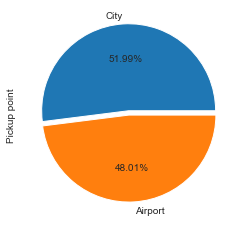

In [39]:
# Cab requests From Airport vs City

pp=df['Pickup point'].value_counts()
pp.plot(kind='pie', autopct='%1.2f%%',explode=[0.05,0]);

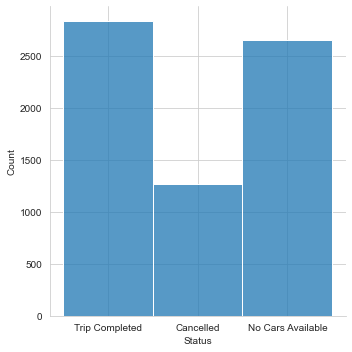

In [31]:
#number of people who completed a trip

sns.displot(data=df, x='Status');

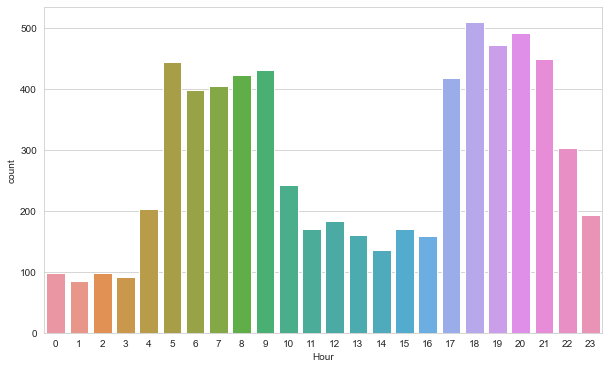

In [12]:
# most busiest time of the day

plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df);

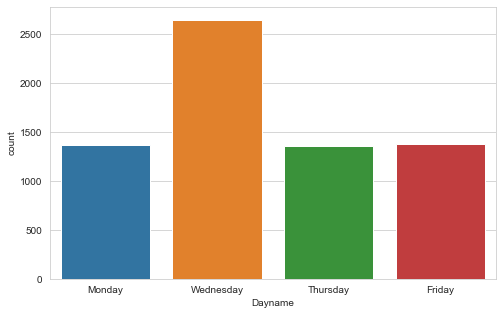

In [13]:
# most busiest day of the week

plt.figure(figsize=(8,5))
sns.countplot(x='Dayname', data=df);

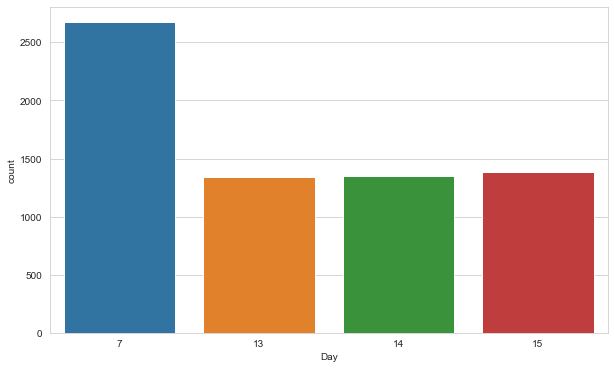

In [14]:
# Most rides on wich day of the month
plt.figure(figsize=(10,6))
sns.countplot(x='Day', data=df);

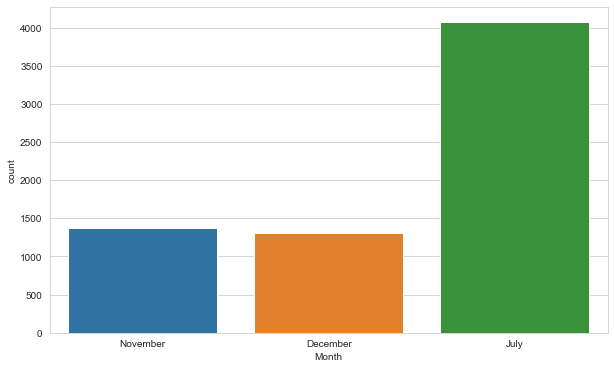

In [15]:
# most rides in wich month

plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df);

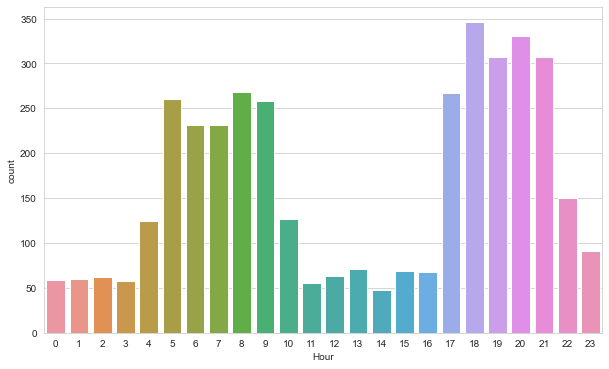

In [40]:
# what time are the most rides cancelled

cn=df.loc[(df.Status)!='Trip Completed']
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=cn);

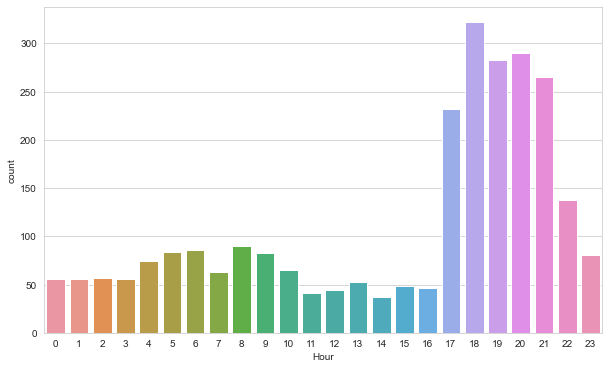

In [17]:
# what time are the rides cancelled due to no cars available

nc=df.loc[(df.Status)=='No Cars Available']
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=nc);